Average annual savings (Electrification + Solar + Storage)
1812.83910454879
Average annual savings (Electrification)
-281.06417048601315
Median solar size:
7.945
Average solar size:
8.493333333333334
Median Payback Period (Electrification Only)
-66.2739448329512
Median Payback Period (Electrification + Solar + Storage)
23.901846316773103
Min Payback Period (Electrification + Solar + Storage)
18.813657780104286
Max Payback Period (Electrification + Solar + Storage)
31.853199811584023
Total Costs (Electrification + Solar + Storage)
42424.3


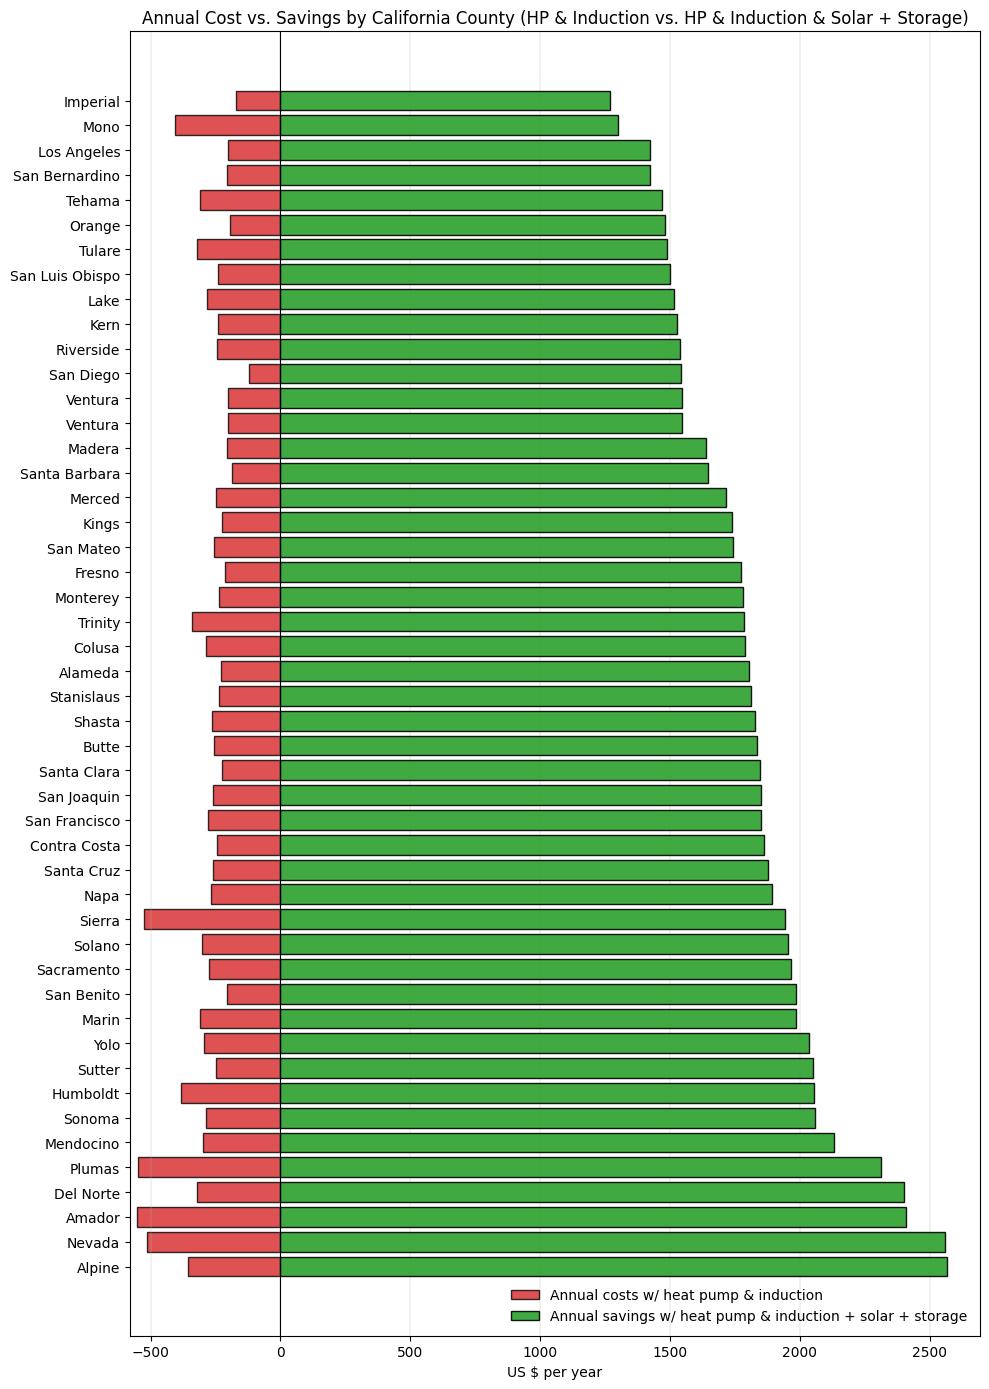

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# ────────────────────────────────────────────────────────────────────
# 1.  Load the GeoJSON
# ────────────────────────────────────────────────────────────────────
gdf = gpd.read_file(
    "../data/loadprofiles/heat_pump_and_induction_stove/single-family-detached/RESULTS/geojson/heat_pump_and_induction_stove.geojson"
)

# ────────────────────────────────────────────────────────────────────
# 2.  Tell the code which columns to plot
#     • savings_col → positive numbers, goes to the RIGHT of 0
#     • cost_col    → we’ll flip the sign so it goes to the LEFT of 0
# ────────────────────────────────────────────────────────────────────
savings_col = "Annual Savings (Electrification + Solar + Storage)"
cost_col    = "Annual Savings (Electrification Only)"   # a cost column, not another savings column!

gdf = gdf.dropna(subset=[cost_col, savings_col])

print("Average annual savings (Electrification + Solar + Storage)")
print(gdf[savings_col].mean())

print("Average annual savings (Electrification)")
print(gdf[cost_col].mean())

print("Median solar size:")
print(gdf["Solar Size (kW)"].median())

print("Average solar size:")
print(gdf["Solar Size (kW)"].mean())

print("Median Payback Period (Electrification Only)")
print(gdf["Payback Period (Electrification Only)"].median())

print("Median Payback Period (Electrification + Solar + Storage)")
print(gdf["Payback Period (Electrification + Solar + Storage)"].median())

print("Min Payback Period (Electrification + Solar + Storage)")
print(gdf["Payback Period (Electrification + Solar + Storage)"].min())

print("Max Payback Period (Electrification + Solar + Storage)")
print(gdf["Payback Period (Electrification + Solar + Storage)"].max())

print("Total Costs (Electrification + Solar + Storage)")
print(gdf["Total Cost (Electrification + Solar + Storage)"].median())

# make sure every cost bar is negative so it starts at 0 and points left
gdf["Cost (left)"] = -gdf[cost_col].abs()    # abs() guarantees we’re working with magnitudes only

# Sort counties for a tidy chart (largest savings on top)
gdf_sorted = gdf.sort_values(savings_col, ascending=False).reset_index(drop=True)

# ────────────────────────────────────────────────────────────────────
# 3.  Build the diverging horizontal bar chart
# ────────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10, 14))

y_pos = np.arange(len(gdf_sorted))

# (a) draw the cost bars FIRST (so they sit behind the green ones)
ax.barh(
    y_pos,
    gdf_sorted["Cost (left)"],
    color="tab:red",
    edgecolor="black",
    alpha=0.8,
    label="Annual costs w/ heat pump & induction",
    zorder=1,                # draw under the savings bars
)

# (b) draw the savings bars SECOND
ax.barh(
    y_pos,
    gdf_sorted[savings_col],
    color="tab:green",
    edgecolor="black",
    alpha=0.9,
    label="Annual savings w/ heat pump & induction + solar + storage",
    zorder=2,
)

ax.set_yticks(y_pos)
ax.set_yticklabels(gdf_sorted["NAME"])
ax.set_xlabel("US $ per year")
ax.set_title("Annual Cost vs. Savings by California County (HP & Induction vs. HP & Induction & Solar + Storage)")

# Draw a vertical zero-line so it’s crystal-clear where the split is
ax.axvline(0, color="black", linewidth=0.8)

# Pad the x-axis limits a bit so the labels don’t hug the frame
x_max = gdf_sorted[savings_col].max() * 1.05
x_min = gdf_sorted["Cost (left)"].min()  * 1.05  # this is already negative
ax.set_xlim(x_min, x_max)

ax.legend(frameon=False, loc="lower right")
ax.grid(axis="x", linewidth=0.25)

plt.tight_layout()
plt.show()